
## Regression
In regression, we aim to predict the value of a continuous target, say $y$ given a vector of input variables $\mathbf{x}=[x_1, x_2,...,x_D]^T$. Thus we aim to learn a function

$
\begin{equation}
y(\mathbf{x}, \mathbf{w})
\end{equation}
$

that predicts the continuous target. Compare this to classification where we map the input to a set of categories.

The function $y(\mathbf{x}, \mathbf{w})$ may take the form of a linear combination of the input variables. That is 

$
\begin{equation}
y(\mathbf{x}, \mathbf{w})=w_0+w_1x_1+\ldots+w_Dx_D
\end{equation}
$

and this is known as linear regression.

We can also consider linear combinations of nonlinear functions of the input variables. That is 

$
\begin{equation}
y(\mathbf{x}, \mathbf{w})=w_0+\sum_{j=1}^{M-1}w_j\phi_j(\mathbf{x})
\end{equation}
$

where $\phi_j(\mathbf{x})$ is known as a basis function.

We can also set

$
\begin{equation}
y(\mathbf{x}, \mathbf{w})=\sum_{j=0}^{M-1}w_j\phi_j(\mathbf{x})=\mathbf{w}^T\phi(\mathbf{x})
\end{equation}
$

with $\phi_0(\mathbf{x})=1$.

## Example
Consider a regression problem where we observe an input variable $x$ and wish  predict a target variable $t$. The toy data are generated below

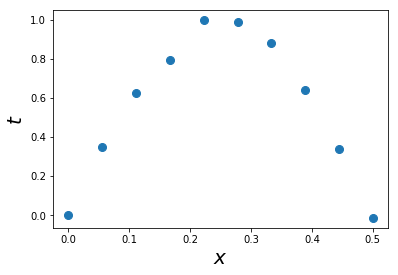

In [2]:
import numpy as np
import matplotlib.pyplot as plt
noise_std = .02 # Noise standard deviation
num_points = 20 # Number of data points
x = np.linspace(0, .5, num_points) #input variables
t = np.sin(2 * np.pi * x) + noise_std * np.random.randn(len(x)) # target variables

#Plot the points
%matplotlib inline
plt.plot(x, t, 'o', markersize=8)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$t$', fontsize=20)

Suppose we assume that we can use a polynomial to model the relationship between $x$ and $t$
\begin{eqnarray*}
t&=&w_0+w_1x+w_2x^2+\ldots+w_Px^P\\
&=&\sum_{i=0}^Pw_ix^i
\end{eqnarray*}

This is of the form

$
\begin{equation}
y(x, \mathbf{w})=\sum_{j=0}^{M-1}w_j\phi_j(x)=\mathbf{w}^T\phi(x)
\end{equation}
$

with $\phi_j(x)=x^j$

The model has a set of parameters $\mathbf{w}=[w_0,\ldots,w_P]^T$ and we can write 
\begin{equation*}
t=y(x,\mathbf{w})
\end{equation*}
Given a polynomial order $P$, we learn the parameters $\mathbf{w}^\ast$ that best explain the training data.


By finding the $\mathbf{w}^\ast$ that minimizes the sum of square error
\begin{equation*}
E(\mathbf{w})=\frac{1}{2}\sum_{n=1}^N(y(x_n,\mathbf{w})-t_n)^2
\end{equation*}
we obtain the polynomial fit of the data $y(x,\mathbf{w}^\ast)$


The numpy function $polyfit$ performs this minimization and returns the coefficients. The function $poly1d$ creates a polynomial object. (Use help to find out what these functions do)

In [3]:
np.polyfit?

In [4]:
np.poly1d?

### Fiting the model

We set the polynomial order and fit the polynomial via least squares.


In [10]:
P = 2
polynomial=np.poly1d(np.polyfit(x, t, P))

To plot the polynomial we create a grid and evaluate the polynomial at these points.


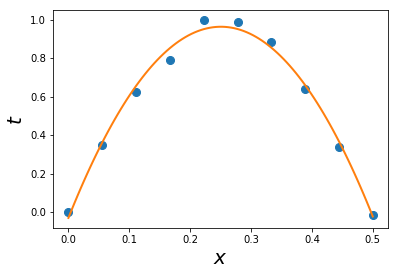

In [13]:
x_plot=np.linspace(0, .5, 100)

%matplotlib inline
plt.plot(x, t, 'o', markersize=8)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$t$', fontsize=20)
plt.plot(x_plot, polynomial(x_plot),linewidth=2)

Play around with the model order and see what happens as you increase the order. What is the best value for $P$?

## Model Selection

Determining the ideal $P$ is problem in model selection. This parameter governs the complexity of the model.
High values of $P$ are more flexible but harder to fit and may suffer numerical instability especially when data are limited.

To determine a good value of $P$ we can monitor the error on a hold out test set. We divide the data into two, a training set and a test set. Here let us use half the data for training and the other half for testing.

In [14]:
x_train = x[range(0, len(x), 2)]
x_test = x[range(1, len(x), 2)]
t_train = t[range(0, len(t),2)]
t_test = t[range(1, len(t), 2)]

We compute the error on the hold out set for $P=0,1,\ldots,9$, a total of 10 values. We also compute the error on the training set.

/home/ciira/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/home/ciira/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/home/ciira/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/home/ciira/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/home/ciira/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


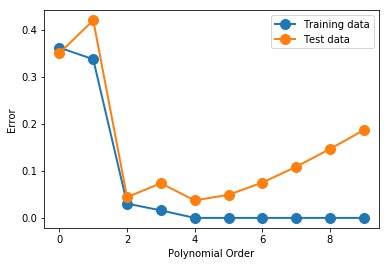

In [15]:
num_order = 10
err_test = np.zeros(num_order)
err_train = np.zeros(num_order)
for order in range(num_order):
    polynomial = np.poly1d(np.polyfit(x_train, t_train, order))
    err_test[order] = np.sqrt(sum((polynomial(x_test) - t_test)**2)/len(x_test))
    err_train[order] = np.sqrt(sum((polynomial(x_train) - t_train)**2)/len(x_train))
    
%matplotlib inline    
plt.plot(range(num_order), err_train, '-o', linewidth=2, markersize=10)
plt.plot(range(num_order), err_test, '-o', linewidth=2, markersize=10)
plt.legend(['Training data','Test data'])
plt.xlabel('Polynomial Order')
plt.ylabel('Error')
    


## K-fold Cross-validation

An alternative approach is to divide the data into $K$ (almost) equal sized parts and use $K-1$ parts to fit the model and test the model on the remaining part. We first dived the data using the scikit-learn package KFold.


In [24]:
from sklearn.model_selection import KFold
import scipy.stats as ss #a package to compute statistics

#Lets generate more data
num_points = 20 # Number of data points
x = np.linspace(0, .5, num_points) #input variables
t = np.sin(2 * np.pi * x) + noise_std * np.random.randn(len(x)) # target variables

num_order = 10
num_folds = 5
err_test = np.zeros((num_folds,num_order))
kf = KFold(n_splits=num_folds)


The variable $kf$ now contains indices indicating which data points correspond to the training and test sets. 

In [25]:
i=0
for train_index, test_index in kf.split(x):
    x_train=x[train_index]
    x_test=x[test_index]
    t_train=t[train_index]
    t_test=t[test_index]
    for order in range(num_order):
        polynomial=np.poly1d(np.polyfit(x_train, t_train, order))
        err_test[i,order]=np.sqrt(sum((polynomial(x_test)-t_test)**2)/len(x_test))
        
    i+=1

For each polynomial order we have error rates for each of the K folds. We can compute the $95\%$ confidence interval of the error and estimate model uncertainty.

(0, 2)

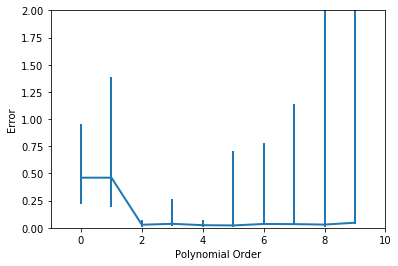

In [26]:
ss.mstats.mquantiles(err_test)
quantiles=ss.mstats.mquantiles(err_test,prob=[0.025, 0.5, 0.975],axis=0)

%matplotlib inline  
plt.errorbar(range(num_order), quantiles[1,:], yerr=[quantiles[0,:],quantiles[2,:]],elinewidth=2,linewidth=2)
plt.xlabel('Polynomial Order')
plt.ylabel('Error')
plt.xlim([-1,10])
plt.ylim([0,2])